
### Target:
1. Setting up a skeleton for the neural network
2. Setting a basic Architecture with GAP to remove the final layer
### Results:
Parameters: 257,354   
Best Train Accuracy: 99.37 %  (15th Epoch)   
Best Test Accuracy: 99.15 %  (14th Epoch)   

### Analysis:
1. The skelton contain combination of multiple Convolution layers with 2 max pooling layer away from the output layer
2. The GAP layer is used to average the whole channel to a single value.
3. Max pooling is applied on two layers on different patches to maximise the content in that particular feature maps
4. The number of parameters are on higher side. This is because we are just create a sample skelton in the first step.
5. We have crossed the RF of 32 (which is more than the image size) with the skelton of the model

In [1]:
#!pip install torchsummary
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import data_loader,data_statistics,modelsummary,train_model,test_model
from model import *

#### Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


In [4]:
batch_size=128
train_loader,train,test_loader,test= data_loader(train_transforms,test_transforms,batch_size)

100%|██████████| 9912422/9912422 [00:00<00:00, 187827925.21it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 32012604.08it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72071315.84it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 16829089.02it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#### Data Statistics
It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


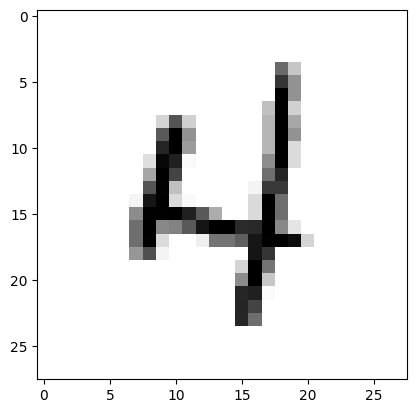

In [5]:
data_statistics(train, train_loader)

#### Code 1- Model 1

In [6]:
model =  Model_1().to(device)
modelsummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
            Conv2d-3           [-1, 16, 28, 28]           1,168
              ReLU-4           [-1, 16, 28, 28]               0
            Conv2d-5           [-1, 32, 28, 28]           4,640
              ReLU-6           [-1, 32, 28, 28]               0
            Conv2d-7           [-1, 64, 28, 28]          18,496
              ReLU-8           [-1, 64, 28, 28]               0
         MaxPool2d-9           [-1, 64, 14, 14]               0
           Conv2d-10          [-1, 128, 14, 14]          73,856
             ReLU-11          [-1, 128, 14, 14]               0
           Conv2d-12          [-1, 128, 14, 14]         147,584
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-1, 12

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_model(model, device, train_loader, optimizer, epoch)
    test_model(model, device, test_loader)

EPOCH: 1


Loss=0.8996164798736572 Batch_id=468 Accuracy=27.44: 100%|██████████| 469/469 [00:18<00:00, 25.20it/s]



Test set: Average loss: 0.9391, Accuracy: 6595/10000 (65.95%)

EPOCH: 2


Loss=0.2708633840084076 Batch_id=468 Accuracy=86.57: 100%|██████████| 469/469 [00:18<00:00, 25.28it/s]



Test set: Average loss: 0.1830, Accuracy: 9438/10000 (94.38%)

EPOCH: 3


Loss=0.05710239335894585 Batch_id=468 Accuracy=95.69: 100%|██████████| 469/469 [00:18<00:00, 25.69it/s]



Test set: Average loss: 0.0777, Accuracy: 9753/10000 (97.53%)

EPOCH: 4


Loss=0.0883881226181984 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:17<00:00, 26.24it/s]



Test set: Average loss: 0.0579, Accuracy: 9816/10000 (98.16%)

EPOCH: 5


Loss=0.007471151649951935 Batch_id=468 Accuracy=97.97: 100%|██████████| 469/469 [00:18<00:00, 25.51it/s]



Test set: Average loss: 0.0560, Accuracy: 9809/10000 (98.09%)

EPOCH: 6


Loss=0.004896420054137707 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:19<00:00, 23.67it/s]



Test set: Average loss: 0.0429, Accuracy: 9854/10000 (98.54%)

EPOCH: 7


Loss=0.024876059964299202 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:18<00:00, 25.75it/s]



Test set: Average loss: 0.0412, Accuracy: 9873/10000 (98.73%)

EPOCH: 8


Loss=0.09341192245483398 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:18<00:00, 24.94it/s]



Test set: Average loss: 0.0347, Accuracy: 9880/10000 (98.80%)

EPOCH: 9


Loss=0.11980914324522018 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:18<00:00, 25.73it/s]



Test set: Average loss: 0.0310, Accuracy: 9892/10000 (98.92%)

EPOCH: 10


Loss=0.011164217256009579 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:18<00:00, 25.15it/s]



Test set: Average loss: 0.0350, Accuracy: 9882/10000 (98.82%)

EPOCH: 11


Loss=0.012823409400880337 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:18<00:00, 25.06it/s]



Test set: Average loss: 0.0260, Accuracy: 9920/10000 (99.20%)

EPOCH: 12


Loss=0.03780848905444145 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:18<00:00, 25.01it/s]



Test set: Average loss: 0.0352, Accuracy: 9880/10000 (98.80%)

EPOCH: 13


Loss=0.01731993816792965 Batch_id=468 Accuracy=99.28: 100%|██████████| 469/469 [00:18<00:00, 25.11it/s]



Test set: Average loss: 0.0321, Accuracy: 9897/10000 (98.97%)

EPOCH: 14


Loss=0.000773596519138664 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:18<00:00, 25.29it/s]



Test set: Average loss: 0.0266, Accuracy: 9915/10000 (99.15%)

EPOCH: 15


Loss=0.002419843804091215 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:18<00:00, 25.31it/s]



Test set: Average loss: 0.0279, Accuracy: 9907/10000 (99.07%)

